# Single Perceptron Example

## Generate a Single Perceptron

In [2]:
import numpy as np
import sys
sys.path.append("..")

In [19]:
## Enable/Disable Titles
show_titles = False

In [3]:
W = np.array(
    [[1, 2],
     [3, -4]]
)
#b = np.array([-1, 6])
b = np.array([-1, 1])

In [4]:
import perceptrons.multilayer as mlp

Perceptron = mlp.FromWeights([W], [b], (2,))

## Input Interval

In [5]:
import geometry.interval as interval
I = interval.Interval(
    -1.0 * np.ones((2,)),
     1.0 * np.ones((2,))
)
V = I.get_vertices()
print(V)

[[-1. -1.]
 [-1.  1.]
 [ 1. -1.]
 [ 1.  1.]]


### Plot Input Interval

In [6]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt

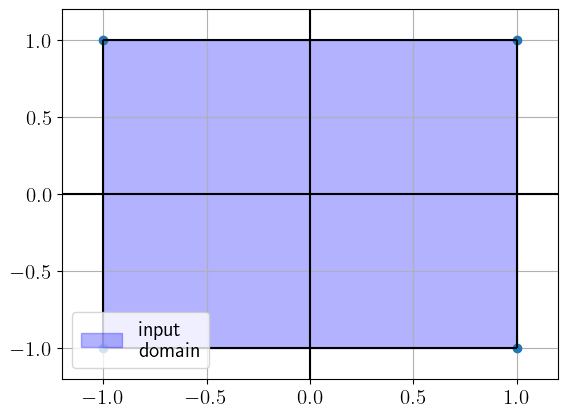

In [20]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'legend.loc': 'lower left'})

Hull_in = ConvexHull(V)
convex_hull_plot_2d(Hull_in)
plt.fill(
    V[Hull_in.vertices,0],
    V[Hull_in.vertices,1],
    alpha=0.3,
    label="input\ndomain",
    color="blue"
)
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)

if show_titles: plt.title("Input Domain")

plt.legend()
plt.show()

## Affine Transformation

In [8]:
PreActiv = np.matmul(V, W) + b
print(PreActiv)

[[-5.  3.]
 [ 1. -5.]
 [-3.  7.]
 [ 3. -1.]]


### Plot Pre-Activation Polytope

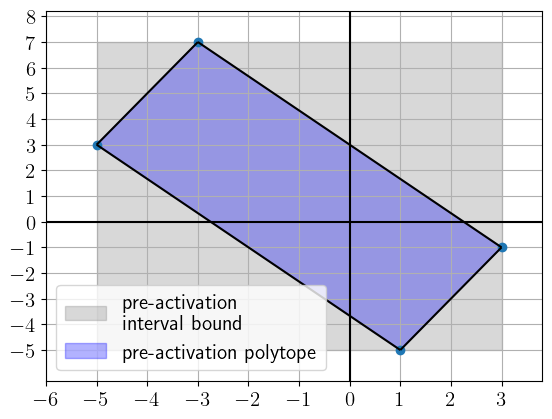

In [21]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'legend.loc': 'lower left'})

## axes
ax = plt.axes()
plt.grid(True)

pre_activ_IB = np.array([
    [-5, 7],
    [3, 7],
    [3, -5],
    [-5, -5]
])
plt.fill(
    pre_activ_IB[:, 0],
    pre_activ_IB[:, 1], 
    alpha=0.3,
    label="pre-activation\ninterval bound",
    color="grey"
)

Hull_pre_activ = ConvexHull(PreActiv)
convex_hull_plot_2d(Hull_pre_activ, ax)
plt.fill(
    PreActiv[Hull_pre_activ.vertices,0],
    PreActiv[Hull_pre_activ.vertices,1], 
    alpha=0.3,
    label="pre-activation polytope",
    color="blue"
)


plt.xticks(list(range(-6, 4, 1)))
plt.yticks(list(range(-5, 9, 1)))

if show_titles: plt.title("The Pre-Activation Polytope and\n its Interval Bound")

plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.legend()
plt.show()

## ReLU Transformation

In [10]:
PostActiv = Perceptron.scores(V)
print(PostActiv)

[[0. 3.]
 [1. 0.]
 [0. 7.]
 [3. 0.]]


### Plot Post-Activation Polytope

[[0.   0.  ]
 [0.   3.  ]
 [2.25 0.  ]]


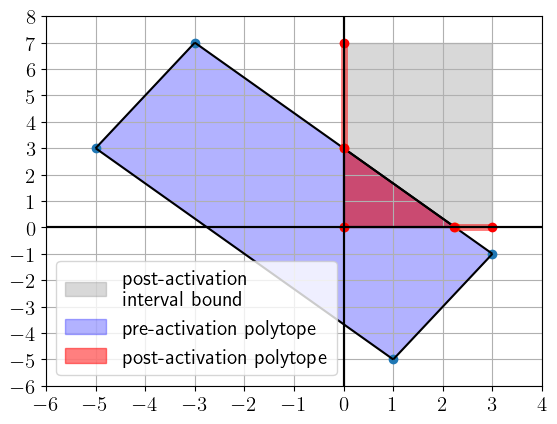

In [22]:
plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'legend.loc': 'lower left'})

## axes
ax = plt.axes()

post_activ_IB = np.array([
    [0, 7],
    [3, 7],
    [3, 0],
    [0, 0]
])
plt.fill(
    post_activ_IB[:, 0],
    post_activ_IB[:, 1], 
    alpha=0.3,
    label="post-activation\ninterval bound",
    color="gray"
)


## plot pre-activ
Hull_pre_activ = ConvexHull(PreActiv)
convex_hull_plot_2d(Hull_pre_activ, ax)
plt.fill(
    PreActiv[Hull_pre_activ.vertices,0],
    PreActiv[Hull_pre_activ.vertices,1], 
    alpha=0.3,
    label="pre-activation polytope",
    color="blue"
)

## Draw Convex Part
ConvSubset = np.array([[0, 0], [0, 3], [2.2500000e+00, 0]])
print(ConvSubset)




########################
# Draw Post-Activation #
########################
Hull_post_activ = ConvexHull(ConvSubset)
convex_hull_plot_2d(Hull_post_activ, ax)
plt.fill(
    ConvSubset[Hull_post_activ.vertices,0],
    ConvSubset[Hull_post_activ.vertices,1], 
    alpha=0.5,
    color="red",
    label="post-activation polytope"
)

## Draw non-convex part
#plt.plot(0, 0, 'bo')
#plt.plot([0, 0], [1, 6.75], color="red", lw=5, alpha=0.2)
plt.plot(0, 7, 'ro')
plt.plot([0, 0], [3, 7], color="red", lw=5, alpha=0.5)
plt.plot(3, 0, 'ro')
plt.plot([2.22, 3], [0, 0], color="red", lw=5, alpha=0.5)

plt.plot(0, 0, 'ro')
plt.plot(0, 3, 'ro')
plt.plot(2.22, 0, 'ro')

#######
# END #
#######


# ## Draw Axes
plt.xticks(list(range(-6, 5, 1)))
plt.yticks(list(range(-6, 9, 1)))
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)
#plt.show()


plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)

if show_titles: plt.title("The Post-Activation Polytope and\n its Interval Bound")

plt.legend()
plt.show()


## Tight Convex Approximation

In [12]:
import perceptrons.convex as convex
TightConvPerceptron = convex.ConvexApprox(Perceptron, I)
ConvPostActiv       = TightConvPerceptron.scores(V)
print(ConvPostActiv)

[[0.0000000e+00 4.6666670e+00]
 [2.2500000e+00 2.3841858e-07]
 [7.5000000e-01 7.0000000e+00]
 [3.0000000e+00 2.3333335e+00]]


### Plot Post-Activation Polytope

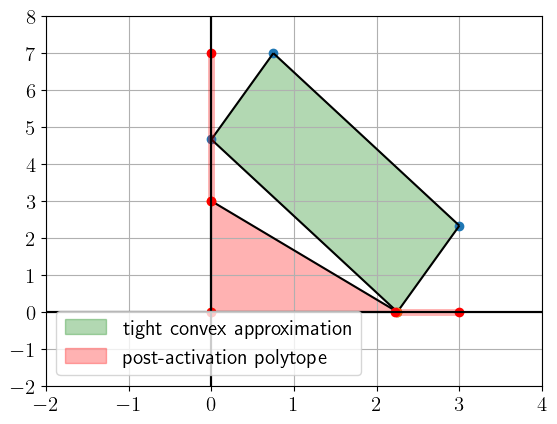

In [23]:
ax = plt.axes()

post_activ_IB = np.array([
    [0, 7],
    [3, 7],
    [3, 0],
    [0, 0]
])
# plt.fill(
#     post_activ_IB[:, 0],
#     post_activ_IB[:, 1], 
#     alpha=0.3,
#     label="post-activation\ninterval bound",
#     color="gray"
# )



Hull_conv_post_activ = ConvexHull(ConvPostActiv)
convex_hull_plot_2d(Hull_conv_post_activ, ax)
plt.fill(
    ConvPostActiv[Hull_conv_post_activ.vertices,0],
    ConvPostActiv[Hull_conv_post_activ.vertices,1], 
    alpha=0.3,
    color="green",
    label="tight convex approximation"
)

## Plot Positive part
Hull_post_activ = ConvexHull(ConvSubset)
convex_hull_plot_2d(Hull_post_activ, ax)
plt.fill(
    ConvSubset[Hull_post_activ.vertices,0],
    ConvSubset[Hull_post_activ.vertices,1], 
    alpha=0.3,
    color="red",
    label="post-activation polytope"
)

## Draw non-convex part
#plt.plot(0, 0, 'bo')
#plt.plot([0, 0], [1, 6.75], color="red", lw=5, alpha=0.2)
plt.plot(0, 7, 'ro')
plt.plot([0, 0], [3, 7], color="red", lw=5, alpha=0.3)
plt.plot(3, 0, 'ro')
plt.plot([2.22, 3], [0, 0], color="red", lw=5, alpha=0.3)

plt.plot(0, 0, 'ro')
plt.plot(0, 3, 'ro')
plt.plot(2.22, 0, 'ro')

# ## Draw Axes
plt.xticks(list(range(-2, 5, 1)))
plt.yticks(list(range(-2, 9, 1)))
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)
#plt.show()


plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)

if show_titles: plt.title("The Post-Activation Polytope and\n its Tight Convex Approximation")

plt.legend()
plt.show()

### Measuring Tight Divergence 

ReLU perceptron score: [0.  5.2]
Conv. perceptron score: [0.975 5.95 ]
0.975


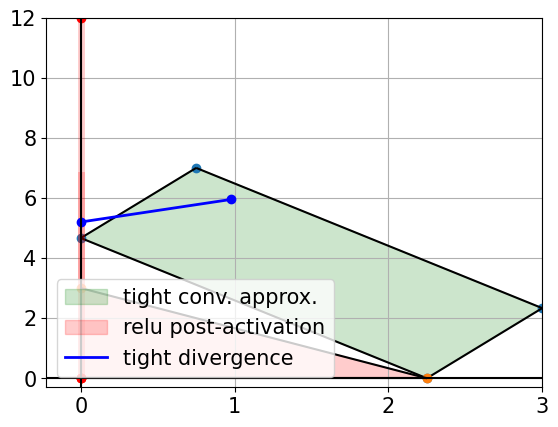

In [14]:
val1 = 0.7
val2 = -0.7
s_relu = Perceptron.scores(np.array([val1, val2]))[0]
s_conv = TightConvPerceptron.scores(np.array([val1, val2]))[0]
print("ReLU perceptron score:", s_relu)
print("Conv. perceptron score:", s_conv)
print(np.max(np.abs(s_relu - s_conv)))

ax = plt.axes()
convex_hull_plot_2d(Hull_conv_post_activ, ax)
plt.fill(
    ConvPostActiv[Hull_conv_post_activ.vertices,0],
    ConvPostActiv[Hull_conv_post_activ.vertices,1], 
    alpha=0.2,
    color="green",
    label="tight conv. approx."
)
convex_hull_plot_2d(Hull_post_activ, ax)
plt.fill(
    ConvSubset[Hull_post_activ.vertices,0],
    ConvSubset[Hull_post_activ.vertices,1], 
    alpha=0.2,
    color="red",
    label="relu post-activation"
)
## Draw non-convex part
plt.plot(0, 0, 'ro')
plt.plot([0, 0], [0, 6.75], color="red", lw=5, alpha=0.2)
plt.plot(0, 0, 'ro')
plt.plot([0, 0], [0, 12], color="red", lw=5, alpha=0.2)
plt.plot(0, 12, 'ro')

plt.plot([s_relu[0], s_conv[0]], [s_relu[1], s_conv[1]], 'b-', label="tight divergence", lw=2)
plt.plot([s_relu[0], s_conv[0]], [s_relu[1], s_conv[1]], 'bo')

## Draw Axes
plt.xticks(list(range(0, 4, 1)))
plt.yticks(list(range(0, 13, 2)))
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)
plt.legend()
plt.show()

### Misclassification

In [15]:
val1_dom = np.arange(-1, 1.1, 0.1)
val2_dom = np.arange(-1, 1.1, 0.1)

point   = np.zeros((2,))
s_relu  = np.zeros((2,))
s_conv  = np.zeros((2,))

max_div         = -np.inf
max_div_point   = np.zeros(2,)
s_relu_keep     = np.zeros(2,)
s_conv_keep     = np.zeros(2,)
for val1 in val1_dom:
    for val2 in val2_dom:
        point   = np.array([val1, val2])
        s_relu  = Perceptron.scores(point)[0]
        s_conv  = TightConvPerceptron.scores(point)[0]

        divergence = np.max(np.abs(s_relu - s_conv))

        if divergence > max_div:
            max_div         = divergence
            max_div_point   = point

            s_relu_keep     = s_relu
            s_conv_keep     = s_conv

#         if np.argmax(s_relu) != np.argmax(s_conv): break
#     if np.argmax(s_relu) != np.argmax(s_conv): break

# print("Misclassified Point:", point)
# print("ReLU perceptron score:", s_relu)
# print("Conv. perceptron score:", s_conv)
# print(np.max(np.abs(s_relu - s_conv)))

print("Maximum Tight Divergence:", max_div)
print("Maximum Tight Divergence Point:", max_div_point)
print("ReLU scores:", s_relu_keep)
print("Conv. Scores:", s_conv_keep)

Maximum Tight Divergence: 2.9166667
Maximum Tight Divergence Point: [-0.9 -0.2]
ReLU scores: [0.0000000e+00 5.9604645e-08]
Conv. Scores: [0.9375    2.9166667]


### Visualization

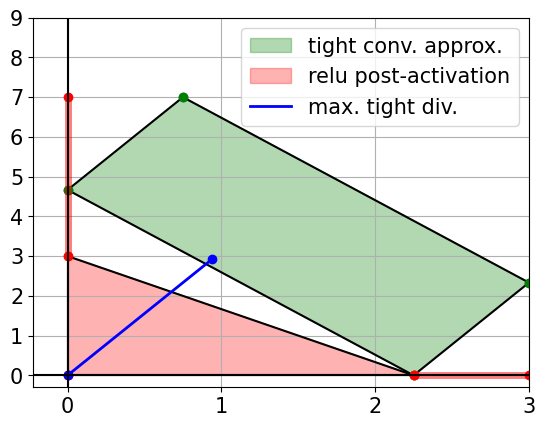

[[0.0000000e+00 4.6666670e+00]
 [2.2500000e+00 2.3841858e-07]
 [7.5000000e-01 7.0000000e+00]
 [3.0000000e+00 2.3333335e+00]]


In [24]:
plt.rcParams.update({'legend.loc': 'upper right'})
plt.rcParams.update({'font.size': 15})
plt.rcParams['text.usetex'] = False


ax = plt.axes()
convex_hull_plot_2d(Hull_conv_post_activ, ax)
plt.fill(
    ConvPostActiv[Hull_conv_post_activ.vertices,0],
    ConvPostActiv[Hull_conv_post_activ.vertices,1], 
    alpha=0.3,
    color="green",
    label="tight conv. approx."
)
plt.plot(0.0000000e+00, 4.6666670e+00, 'go')
plt.plot(2.2500000e+00, 2.3841858e-07, 'go')
plt.plot(7.5000000e-01, 7.0000000e+00, 'go')
plt.plot(3.0000000e+00, 2.3333335e+00, 'go')



convex_hull_plot_2d(Hull_post_activ, ax)
plt.fill(
    ConvSubset[Hull_post_activ.vertices,0],
    ConvSubset[Hull_post_activ.vertices,1], 
    alpha=0.3,
    color="red",
    label="relu post-activation"
)
## Draw non-convex part
plt.plot(0, 7, 'ro')
plt.plot([0, 0], [3, 7], color="red", lw=5, alpha=0.5)
plt.plot(3, 0, 'ro')
plt.plot([2.2500000e+00, 3], [0, 0], color="red", lw=5, alpha=0.5)

plt.plot(0, 0, 'ro')
plt.plot(0, 3, 'ro')
plt.plot(2.2500000e+00, 0, 'ro')

plt.plot([s_relu_keep[0], s_conv_keep[0]], [s_relu_keep[1], s_conv_keep[1]], 'b-', label="max. tight div.", lw=2)
plt.plot([s_relu_keep[0], s_conv_keep[0]], [s_relu_keep[1], s_conv_keep[1]], 'bo')

## Draw Axes
plt.xticks(list(range(0, 4, 1)))
plt.yticks(list(range(0, 10, 1)))
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)
plt.legend()

if show_titles: plt.title("The Worst Case Tight Divergence")

plt.show()

print(ConvPostActiv)

## The Approximations in $V(\Lambda)$

0.375
0.5833333333333334


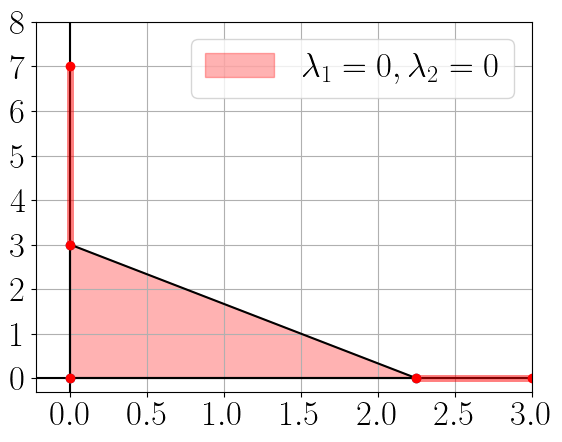

In [17]:
# LaTeX
plt.rcParams.update({'font.size': 25})
plt.rcParams.update({'legend.loc': 'upper right'})
plt.rcParams['text.usetex'] = True

## Axes
ax = plt.axes()
plt.axhline(y=0, color='black')
plt.axvline(x=0, color='black')
plt.grid(True)
#plt.legend()

## Sampling
N = 100000
R = I.random_points(N)
# print(R.shape)
# print(R[0, :])

Pre_ActivR = np.matmul(R, W) + b
# print(Pre_ActivR.shape)
# print(Pre_ActivR[0, :])


## Pre-activation bounds
u1 = 3
u2 = 7
l1 = -5
l2 = -5

q_1 = u1 / (u1 - l1)
q_2 = u2 / (u2 - l2)
print(q_1)
print(q_2)


######################
# Drw Pre-Activation #
######################

# Hull_pre_activ = ConvexHull(PreActiv)
# convex_hull_plot_2d(Hull_pre_activ, ax)
# plt.fill(
#     PreActiv[Hull_pre_activ.vertices,0],
#     PreActiv[Hull_pre_activ.vertices,1], 
#     alpha=0.3,
#     label="pre-activation polytope",
#     color="blue"
# )


#######
# END #
#######


################################
# \lambda_1 = 0, \lambda_1 = 0 #
################################
Hull_post_activ = ConvexHull(ConvSubset)
convex_hull_plot_2d(Hull_post_activ, ax)
plt.fill(
    ConvSubset[Hull_post_activ.vertices,0],
    ConvSubset[Hull_post_activ.vertices,1], 
    alpha=0.3,
    color="red",
    label="$\lambda_1 = 0, \lambda_2 = 0$"
)

## Draw non-convex part
#plt.plot(0, 0, 'bo')
#plt.plot([0, 0], [1, 6.75], color="red", lw=5, alpha=0.2)
plt.plot(0, 7, 'ro')
plt.plot([0, 0], [3, 7], color="red", lw=5, alpha=0.5)
plt.plot(3, 0, 'ro')
plt.plot([2.2500000e+00, 3], [0, 0], color="red", lw=5, alpha=0.5)

plt.plot(0, 0, 'ro')
plt.plot(0, 3, 'ro')
plt.plot(2.2500000e+00, 0, 'ro')

#######
# END #
#######



# ################################
# # \lambda_1 = 0, \lambda_1 = 1 #
# ################################



# ## Draw Approx. with Sampling ##


# # #apply relu at 1st coordinate
# # Pre_ActivR[:, 0] = np.maximum(Pre_ActivR[:, 0], np.zeros(Pre_ActivR[:, 0].shape))
# # print(Pre_ActivR[0, :])

# # Pre_ActivR[:, 1] = q_2 * Pre_ActivR[:, 1] - q_2 * l2
# # print(Pre_ActivR[0, :])

# # plt.plot(Pre_ActivR[:, 0], Pre_ActivR[:, 1], 'o')

# ## END ##



# ## Re creating the graph
# left_conx_approx = np.array([
#     [0, 4.666667],
#     [3, 2.3333335],
#     [1, 0],
#     [0, 0.9]
# ])
# Hull_left_conx_approx = ConvexHull(left_conx_approx)
# convex_hull_plot_2d(Hull_left_conx_approx, ax)
# plt.fill(
#     left_conx_approx[:, 0],
#     left_conx_approx[:, 1], 
#     alpha=0.5,
#     label="$\lambda_1 = 0, \lambda_2 = 1$",
#     color="orange"
# )
# plt.plot(0, 4.666667, 'o', color="orange")
# plt.plot(0, 7, 'o', color="orange")
# plt.plot([0, 0], [4.666667, 7], color="orange", lw=5, alpha=0.5)

# plt.plot(0, 0, 'ro')
# plt.plot(0, 3, 'ro')
# plt.plot(2.25, 0, 'ro')

# #######
# # END #
# #######


# ################################
# # \lambda_1 = 1, \lambda_1 = 0 #
# ################################
# #apply relu at 1st coordinate
# # Pre_ActivR[:, 1] = np.maximum(Pre_ActivR[:, 1], np.zeros(Pre_ActivR[:, 1].shape))
# # print(Pre_ActivR[0, :])

# # Pre_ActivR[:, 0] = q_1 * Pre_ActivR[:, 0] - q_1 * l1
# # print(Pre_ActivR[0, :])

# # plt.plot(Pre_ActivR[:, 0], Pre_ActivR[:, 1], 'o')


# ## Re creating the graph
# right_conx_approx = np.array([
#     [7.5000000e-01, 0],
#     [0, 3],
#     [7.5000000e-01, 7],
#     [2.7, 0]
# ])
# Hull_right_conx_approx = ConvexHull(right_conx_approx)
# convex_hull_plot_2d(Hull_right_conx_approx, ax)
# plt.fill(
#     right_conx_approx[:, 0],
#     right_conx_approx[:, 1], 
#     alpha=0.5,
#     label="$\lambda_1 = 1, \lambda_2 = 0$",
#     color="purple"
# )

# plt. plot(7.5000000e-01, 0, 'o', color="purple")
# plt.plot(0, 3, 'o', color="purple")
# plt.plot(7.5000000e-01, 7, 'o', color="purple")
# plt.plot(2.7, 0, 'o', color="purple")

# plt.plot([2.7, 3], [0, 0], color="purple", lw=5, alpha=0.5)
# plt.plot(3, 0, 'o', color="purple")

# #######
# # END #
# #######


# #######################
# # Tight Approximation #
# #######################

# Hull_conv_post_activ = ConvexHull(ConvPostActiv)
# convex_hull_plot_2d(Hull_conv_post_activ, ax)
# plt.fill(
#     ConvPostActiv[Hull_conv_post_activ.vertices,0],
#     ConvPostActiv[Hull_conv_post_activ.vertices,1], 
#     alpha=0.3,
#     color="green",
#     label="$\lambda_1 = 1, \lambda_2 = 1$"
# )
# print()
# print(ConvPostActiv)

# #######
# # END #
# #######



plt.xticks(list(np.arange(0, 3.5, 0.5)))
plt.yticks(list(range(0, 9, 1)))
plt.legend()
#plt.title("All the Approximations of $V(\Lambda)$")
plt.show()


## Convex Relaxation for Single Perceptron

0.0
3.0
s1_tilde(0) =  1.875


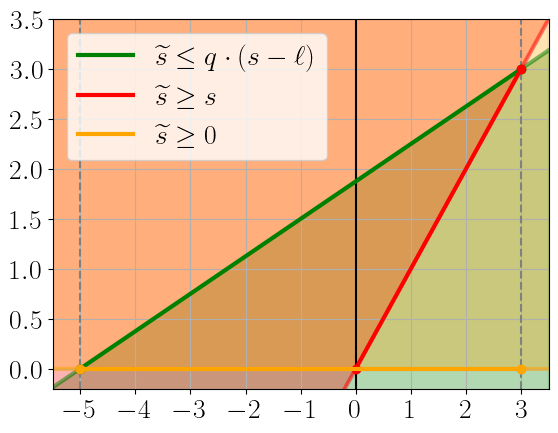

In [25]:
# LaTeX
plt.rcParams.update({'font.size': 20})
plt.rcParams.update({'legend.loc': 'upper left'})
plt.rcParams['text.usetex'] = True

## Axes
ax = plt.axes()
plt.axvline(x=0, color='black', linestyle="-")

## Pre-activation bounds
u1 = 3
u2 = 7
l1 = -5
l2 = -5

q_1 = u1 / (u1 - l1)
q_2 = u2 / (u2 - l2)
# print(q_1)
# print(q_2)

## Draw Interval
plt.axvline(x=l1, color='gray', linestyle="--")
plt.axvline(x=u1, color='gray', linestyle="--")

##########################
# Draw Convex Constraint #
##########################
## \widetilve{s} \leq q * (s - l)
s1_tilde = lambda s: q_1 * (s - l1)
print(s1_tilde(l1))
print(s1_tilde(u1))

plt.plot(-5, 0, 'go')
plt.plot(3, 3, 'go')
plt.plot([-5, 3], [0, 3], color="green", lw=3, alpha=1, label="$\widetilde{s} \leq q\cdot(s - \ell)$")
plt.plot([3, 11], [3, 6], color="green", lw=3, alpha=0.5, linestyle="-")
plt.plot([-13, -5], [-3, 0], color="green", lw=3, alpha=0.5, linestyle="-")

endpoint_1 = np.array([l1, s1_tilde(l1)])
endpoint_2 = np.array([u1, s1_tilde(u1)])
d = endpoint_1 - (endpoint_2 - endpoint_1)
print("s1_tilde(0) = ", s1_tilde(0))

## draw half-space
xs = np.arange(-5.5, 3.5, 0.01)
ys = s1_tilde(xs)

## super bellow
depths = -1 * np.ones(xs.shape)
ax.fill_between(xs, ys, depths, color="green", alpha=0.3)

#######
# END #
#######


######################
# Draw Id constraint #
######################

plt.plot(0, 0, 'ro')
plt.plot(3, 3, 'ro')
plt.plot([0, 3], [0, 3], color="red", lw=3, alpha=1, label="$\widetilde{s} \geq s$")
plt.plot([-5, 0], [-5, 0], color="red", lw=3, alpha=0.5, linestyle="-")
plt.plot([3, 3.5], [3, 3.5], color="red", lw=3, alpha=0.5, linestyle="-")


## skyhigh
skyhigh = 5 * np.ones(xs.shape)
ax.fill_between(xs, skyhigh, xs, color="red", alpha=0.3)
#######
# END #
#######



############################
# Draw positive constraint #
############################

plt.plot(-5, 0, 'o', color="orange")
plt.plot(3, 0, 'o', color="orange")
plt.plot([-5, 3], [0, 0], color="orange", lw=3, alpha=1, label="$\widetilde{s} \geq 0$")
plt.plot([-5.5, -5], [0, 0], color="orange", lw=3, alpha=0.5, linestyle="-")
plt.plot([3, 3.5], [0, 0], color="orange", lw=3, alpha=0.5, linestyle="-")


## skyhigh
baseline = np.zeros(xs.shape)
ax.fill_between(xs, baseline, skyhigh, color="orange", alpha=0.3)
#######
# END #
#######


## Show
plt.xticks(list(np.arange(-5, 4, 1)))
plt.yticks(list(np.arange(0, 4, 0.5)))
ax.set(xlim=(-5.5, 3.5), ylim=(-0.2, 3.5))
plt.grid(True)
plt.legend()
if show_titles: plt.title("The Feasible Area\n of the Relaxed Convex Program")
plt.show()